# Machine Learning - Assignment Group B

## Dataset 2 (peugeot_01)

### Tasks of Assignement - Purpose of this notebook! 
- Import dataset into environment and prepare for Machine Learning (ML) tasks
- Replace text in columns(roadSurface,traffic,drivingStyle, with 0,1,2) etc
- Using Matplotlib/seaborn plot data to find useful features for classification
- Split the data to make training data and test data
- run Logistic Classification model
- assess accuracy/usefulness meaure of Logistic Classification model
- run SVM Classigication model
- assess accuracy/usefulness measure of SVM Classification model
- Compare Logistic vs SVM
- run KNN Classification Model
- assess accuracy/usefulness measure of KNN
- tweak params of KNN to find best fit for model prediction
- Load new data set and perform modelling/classification on entire set

**Import 2000 rows from the dataset - prepare dataset for ML**

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
#peugeot01_LGa file_path = '../input/peugeot_01_LGa.csv' and read in =1000
peugeot_01LGa = ('C:\\Users\\Liam\\peugeot_01_LGa.csv')
# read in 2000 rows and store data in DataFrame titled opel_corsa01_data
#opel_corsa01_data = pd.read_csv(opel_corsa_01LGa, nrows=2000)
peugeot_01_data = pd.read_csv(peugeot_01LGa)
# print a summary of the data in peugeot_01_LGa
peugeot_01_data.describe()



AltitudeVariation  VehicleSpeedInstantaneous  VehicleSpeedAverage  \
count        8199.000000                8196.000000          8199.000000   
mean           -0.167142                  46.627707            46.889535   
std             2.271266                  35.940316            33.502960   
min           -24.600006                   0.000000             0.000000   
25%            -1.300003                  18.900000            19.582499   
50%            -0.099998                  37.799999            35.954999   
75%             0.900002                  81.000000            75.337498   
max            10.299999                 119.699997           114.884997   

       VehicleSpeedVariance  VehicleSpeedVariation  LongitudinalAcceleration  \
count           8199.000000            8199.000000               8199.000000   
mean             159.545051              -0.020856                  1.127696   
std              188.542234               2.760644                  0.759994   
min                0.000000            -103.500000                 -1.457600   
25%               41.323268              -0.900000                  0.578950   
50%              103.799893               0.000000                  1.161900   
75%              202.930619               0.900002                  1.646400   
max             1418.370369              97.199997                  3.979800   

        EngineLoad  EngineCoolantTemperature  ManifoldAbsolutePressure  \
count  8194.000000               8194.000000               8194.000000   
mean     45.079854                 68.191237                115.252990   
std      30.615258                 17.535489                 16.322914   
min       0.000000                 12.000000                 88.000000   
25%      23.137255                 56.000000                103.000000   
50%      40.392159                 79.000000                107.000000   
75%      75.686279                 79.000000                126.000000   
max     100.000000                 86.000000                170.000000   

         EngineRPM  MassAirFlow  IntakeAirTemperature  VerticalAcceleration  \
count  8194.000000  8194.000000           8194.000000           8199.000000   
mean   1520.705394    16.992544             33.897120             -0.649417   
std     611.017251     9.174752             11.639077              0.640123   
min       0.000000     0.880000              8.000000             -2.763100   
25%     898.625000     7.300000             24.000000             -1.052800   
50%    1496.500000    17.219999             36.000000             -0.649800   
75%    1975.375000    24.740000             41.000000             -0.180550   
max    2802.500000    38.549999             65.000000              0.999900   

       FuelConsumptionAverage  
count             8194.000000  
mean                12.986515  
std                  3.136726  
min                  7.847495  
25%                 10.086075  
50%                 12.868294  
75%                 14.868025  
max                 27.919697

In [26]:
#peugeot_02_LGa file_path = '../input/peugeot_02_LGa.csv' 
peugeot_02LGa = ('C:\\Users\\Liam\\peugeot_02_LGa.csv')
# read in 2000 rows and store data in DataFrame titled peugeot_02_data
peugeot_02_data = pd.read_csv(peugeot_02LGa)
# print a summary of the data in peugeot_02_LGa
peugeot_02_data.describe()

AltitudeVariation  VehicleSpeedInstantaneous  VehicleSpeedAverage  \
count        4446.000000                4440.000000          4446.000000   
mean            0.100135                  22.962508            22.975994   
std             1.797515                  18.623617            14.424310   
min            -9.199997                   0.000000             0.000000   
25%            -0.599998                   5.400000            11.396250   
50%             0.000000                  22.500000            21.021283   
75%             0.900002                  36.899998            35.459999   
max            11.400002                  72.000000            59.984998   

       VehicleSpeedVariance  VehicleSpeedVariation  LongitudinalAcceleration  \
count           4446.000000            4446.000000               4446.000000   
mean             137.937403              -0.014014                 -0.137473   
std              132.251407               2.258688                  0.758267   
min                0.000000             -31.072817                 -3.065000   
25%               48.322445              -0.900000                 -0.563500   
50%              103.170886               0.000000                 -0.217000   
75%              174.184256               0.900000                  0.307475   
max              864.046635              30.599998                  2.244800   

        EngineLoad  EngineCoolantTemperature  ManifoldAbsolutePressure  \
count  4446.000000               4446.000000               4446.000000   
mean     39.771728                 62.056230                105.556230   
std      25.467201                 18.477506                  5.390143   
min       0.000000                 15.000000                 96.000000   
25%      27.843138                 47.000000                102.000000   
50%      36.862747                 66.000000                103.000000   
75%      60.000000                 79.000000                107.000000   
max     100.000000                 86.000000                144.000000   

         EngineRPM  MassAirFlow  IntakeAirTemperature  VerticalAcceleration  \
count  4446.000000  4446.000000           4446.000000           4446.000000   
mean   1138.302632    11.446912             20.624606             -0.150632   
std     389.589388     5.967084              5.206478              0.560713   
min       0.000000     0.880000             11.000000             -2.510900   
25%     780.500000     5.580000             17.000000             -0.453725   
50%    1060.500000    10.360000             20.000000             -0.051000   
75%    1473.500000    16.629999             24.000000              0.196100   
max    2239.000000    30.990000             41.000000              1.501500   

       FuelConsumptionAverage  
count             4446.000000  
mean                16.710177  
std                  4.136263  
min                 10.344559  
25%                 12.978312  
50%                 15.995884  
75%                 20.450338  
max                 30.672386

In [27]:
df = peugeot_01_data
#print out first 5 rows of data set
df.head()

AltitudeVariation  VehicleSpeedInstantaneous  VehicleSpeedAverage  \
0         -13.399994                  20.699999                6.060   
1         -13.200005                  17.100000                6.345   
2         -13.200005                  14.400000                6.585   
3         -11.800003                  14.400000                6.825   
4         -19.800003                  14.400000                7.065   

   VehicleSpeedVariance  VehicleSpeedVariation  LongitudinalAcceleration  \
0            115.840061              -4.500000                    1.0548   
1            117.200816              -3.599998                    0.9012   
2            117.559595              -2.700001                    0.9331   
3            117.801222               0.000000                    0.9878   
4            117.925697               0.000000                    1.1316   

   EngineLoad  EngineCoolantTemperature  ManifoldAbsolutePressure  EngineRPM  \
0   38.039215                      31.0                     101.0      798.0   
1   38.039215                      31.0                     101.0      797.5   
2   90.588234                      32.0                     101.0      797.5   
3   90.588234                      32.0                     101.0      726.0   
4   92.941177                      32.0                     101.0      784.0   

   MassAirFlow  IntakeAirTemperature  VerticalAcceleration  \
0         6.22                  15.0               -0.5982   
1         6.27                  15.0               -0.5244   
2         6.27                  15.0               -0.5068   
3         8.63                  15.0               -0.4882   
4         8.88                  15.0               -0.6712   

   FuelConsumptionAverage      roadSurface                 traffic  \
0               27.919697  SmoothCondition  LowCongestionCondition   
1               26.458355  SmoothCondition  LowCongestionCondition   
2               26.458355  SmoothCondition  LowCongestionCondition   
3               26.004126  SmoothCondition  LowCongestionCondition   
4               25.295498  SmoothCondition  LowCongestionCondition   

    drivingStyle  
0  EvenPaceStyle  
1  EvenPaceStyle  
2  EvenPaceStyle  
3  EvenPaceStyle  
4  EvenPaceStyle

**replace text values in target columns**
- target columns = drivingStyle and roadSurface


In [28]:
dfpeu = peugeot_02_data
#print out first 5 rows of data set
dfpeu.head()

AltitudeVariation  VehicleSpeedInstantaneous  VehicleSpeedAverage  \
0          -0.599998                  24.299999             8.720689   
1           0.099998                  27.900000             9.045762   
2          -0.200001                  30.599998             9.405000   
3          -0.899998                  29.699999             9.900000   
4          -0.900002                  28.799999            10.380000   

   VehicleSpeedVariance  VehicleSpeedVariation  LongitudinalAcceleration  \
0             46.843772               6.299999                   -1.2903   
1             52.270798               3.600000                   -1.4038   
2             59.127937               2.699999                   -1.3209   
3             64.360674              -0.900000                   -1.4974   
4             68.519589              -0.900000                   -1.3275   

   EngineLoad  EngineCoolantTemperature  ManifoldAbsolutePressure  EngineRPM  \
0   67.058823                        26                       115     1809.0   
1    0.000000                        26                       107      947.5   
2   28.235294                        26                       103      797.0   
3    0.000000                        26                       101     1112.0   
4   71.764709                        26                       102     1150.0   

   MassAirFlow  IntakeAirTemperature  VerticalAcceleration  \
0    22.360001                    15                0.1468   
1    23.129999                    17                0.2022   
2    10.130000                    17                0.1834   
3     6.050000                    15                0.2099   
4    11.740000                    15                0.2898   

   FuelConsumptionAverage      roadSurface                    traffic  \
0               28.784592  UnevenCondition  NormalCongestionCondition   
1               28.728073  UnevenCondition  NormalCongestionCondition   
2               27.799021  UnevenCondition  NormalCongestionCondition   
3               26.150261  UnevenCondition  NormalCongestionCondition   
4               25.721266  UnevenCondition  NormalCongestionCondition   

    drivingStyle  
0  EvenPaceStyle  
1  EvenPaceStyle  
2  EvenPaceStyle  
3  EvenPaceStyle  
4  EvenPaceStyle

In [29]:
df['drivingStyle'] = df.drivingStyle.replace({'EvenPaceStyle': 0, 'AggressiveStyle': 1})
df['roadSurface']= df.roadSurface.replace({'SmoothCondition': 0, 'UnevenCondition': 1})
df['traffic'] = df.traffic.replace({'LowCongestionCondtion': 0, 'NormalCongestionCondition': 1, 'HighCongestionCondition': 2})
dfpeu['drivingStyle'] = dfpeu.drivingStyle.replace({'EvenPaceStyle': 0, 'AggressiveStyle': 1})
dfpeu['roadSurface']= dfpeu.roadSurface.replace({'SmoothCondition': 0, 'UnevenCondition': 1})
dfpeu['traffic'] = dfpeu.traffic.replace({'LowCongestionCondtion': 0, 'NormalCongestionCondition': 1, 'HighCongestionCondition': 2})


In [30]:
df.head()

AltitudeVariation  VehicleSpeedInstantaneous  VehicleSpeedAverage  \
0         -13.399994                  20.699999                6.060   
1         -13.200005                  17.100000                6.345   
2         -13.200005                  14.400000                6.585   
3         -11.800003                  14.400000                6.825   
4         -19.800003                  14.400000                7.065   

   VehicleSpeedVariance  VehicleSpeedVariation  LongitudinalAcceleration  \
0            115.840061              -4.500000                    1.0548   
1            117.200816              -3.599998                    0.9012   
2            117.559595              -2.700001                    0.9331   
3            117.801222               0.000000                    0.9878   
4            117.925697               0.000000                    1.1316   

   EngineLoad  EngineCoolantTemperature  ManifoldAbsolutePressure  EngineRPM  \
0   38.039215                      31.0                     101.0      798.0   
1   38.039215                      31.0                     101.0      797.5   
2   90.588234                      32.0                     101.0      797.5   
3   90.588234                      32.0                     101.0      726.0   
4   92.941177                      32.0                     101.0      784.0   

   MassAirFlow  IntakeAirTemperature  VerticalAcceleration  \
0         6.22                  15.0               -0.5982   
1         6.27                  15.0               -0.5244   
2         6.27                  15.0               -0.5068   
3         8.63                  15.0               -0.4882   
4         8.88                  15.0               -0.6712   

   FuelConsumptionAverage roadSurface                 traffic  drivingStyle  
0               27.919697           0  LowCongestionCondition             0  
1               26.458355           0  LowCongestionCondition             0  
2               26.458355           0  LowCongestionCondition             0  
3               26.004126           0  LowCongestionCondition             0  
4               25.295498           0  LowCongestionCondition             0

to confirm the shape of the datafield df can run shape

In [31]:
df.shape
#dfop.shape

(8199, 17)

In [32]:
dfpeu.shape

(4446, 17)

In df we have 16 columns and 2000 rows, columns 1-14 are our features, and columns 15 and 16 are going to be our responce. Looking at a few of the columns using pairplot function - to check if any columns are lineraly related - but little evidence seen in various plots to indicate any linearity between columns (see pairplot below). Correlation Matrix and Scatter Plots provide better criterea for selecting features to predict one of the two responses.

Continuing with this example it was chosen to predict a responce for 'drivingStyle'. From the data shown in the bar graphs - 'drivingStyle' has more intances for 0 and 1 in the 1-2000 data points

Before maikng any classification models - we can plot the data using seaborn and matplotlib - useful for statisical data visualisation


c:\users\liam\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


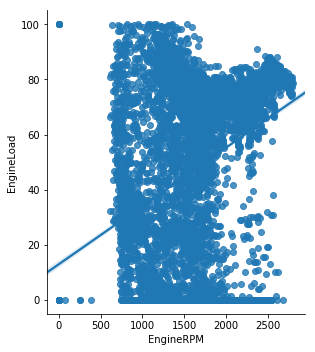

In [33]:
import seaborn as sns
%matplotlib inline 
sns.pairplot(df, x_vars=['EngineRPM' ],y_vars='EngineLoad', size=5,aspect=0.9, kind='reg')

In [34]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os 

In [35]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 3 and nunique[col] < 2000]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 0.7, w_pad = 0.5, h_pad = 0.5)
    plt.show()

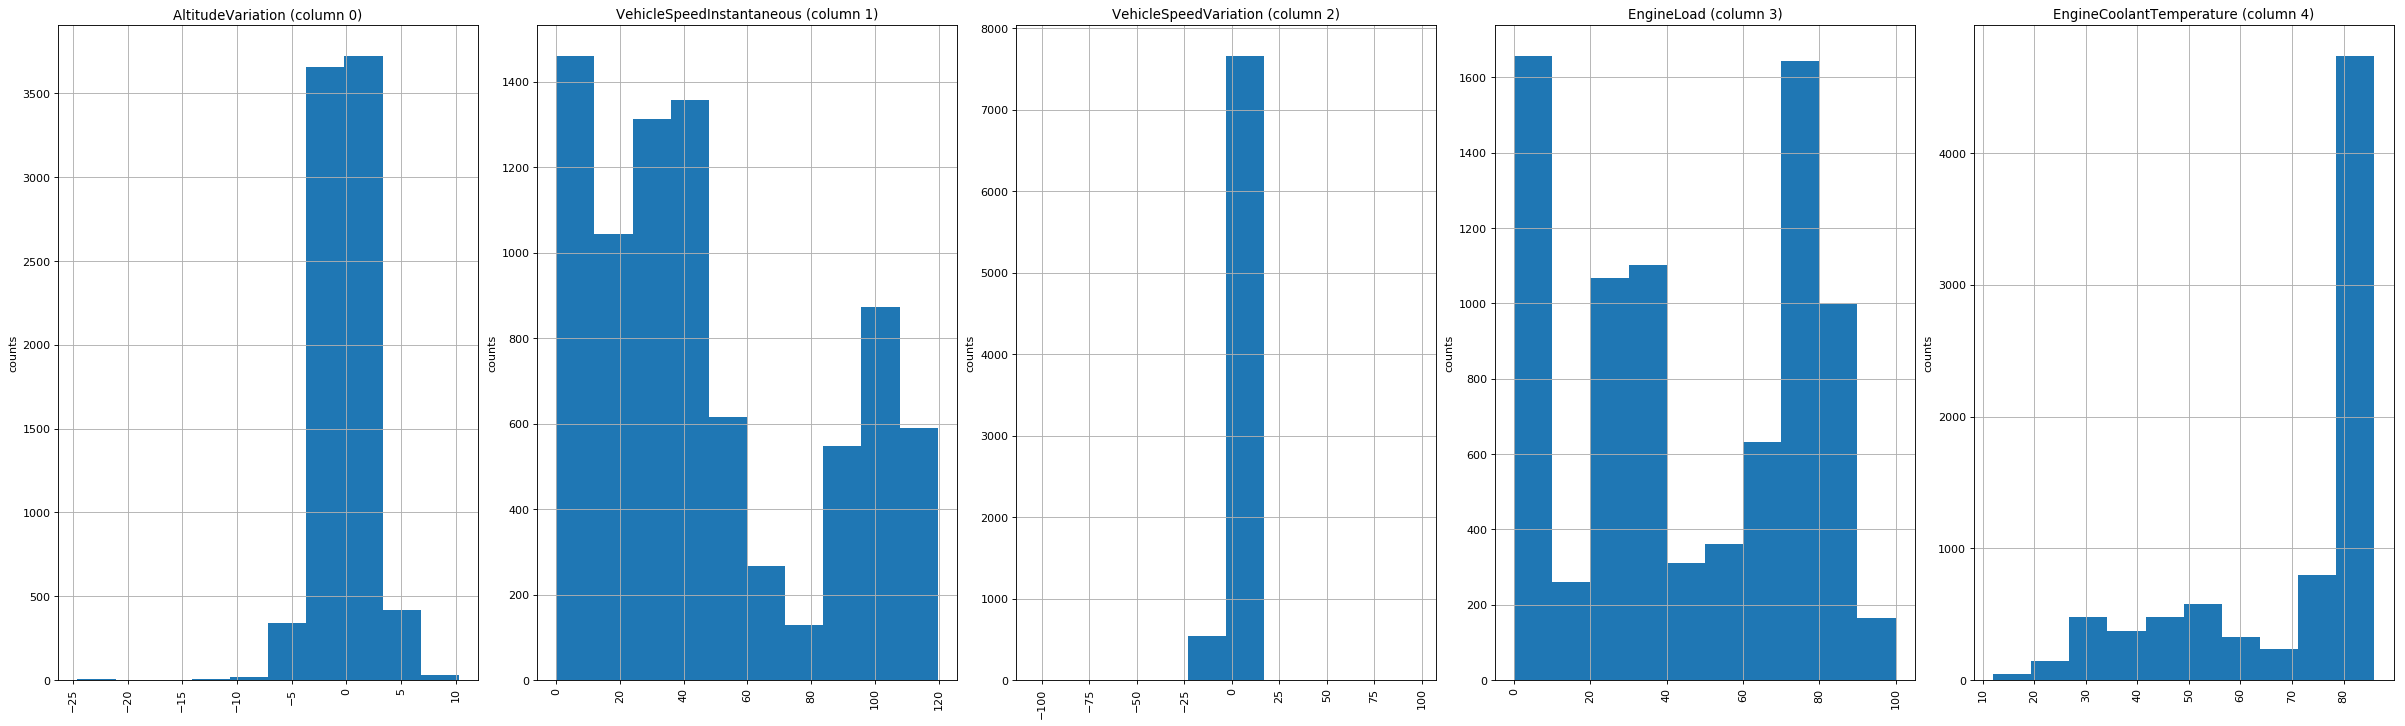

In [36]:
plotPerColumnDistribution(df, 5, 6)

In [39]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 1000]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 0.7, w_pad = 0.5, h_pad = 0.5)
    plt.show()

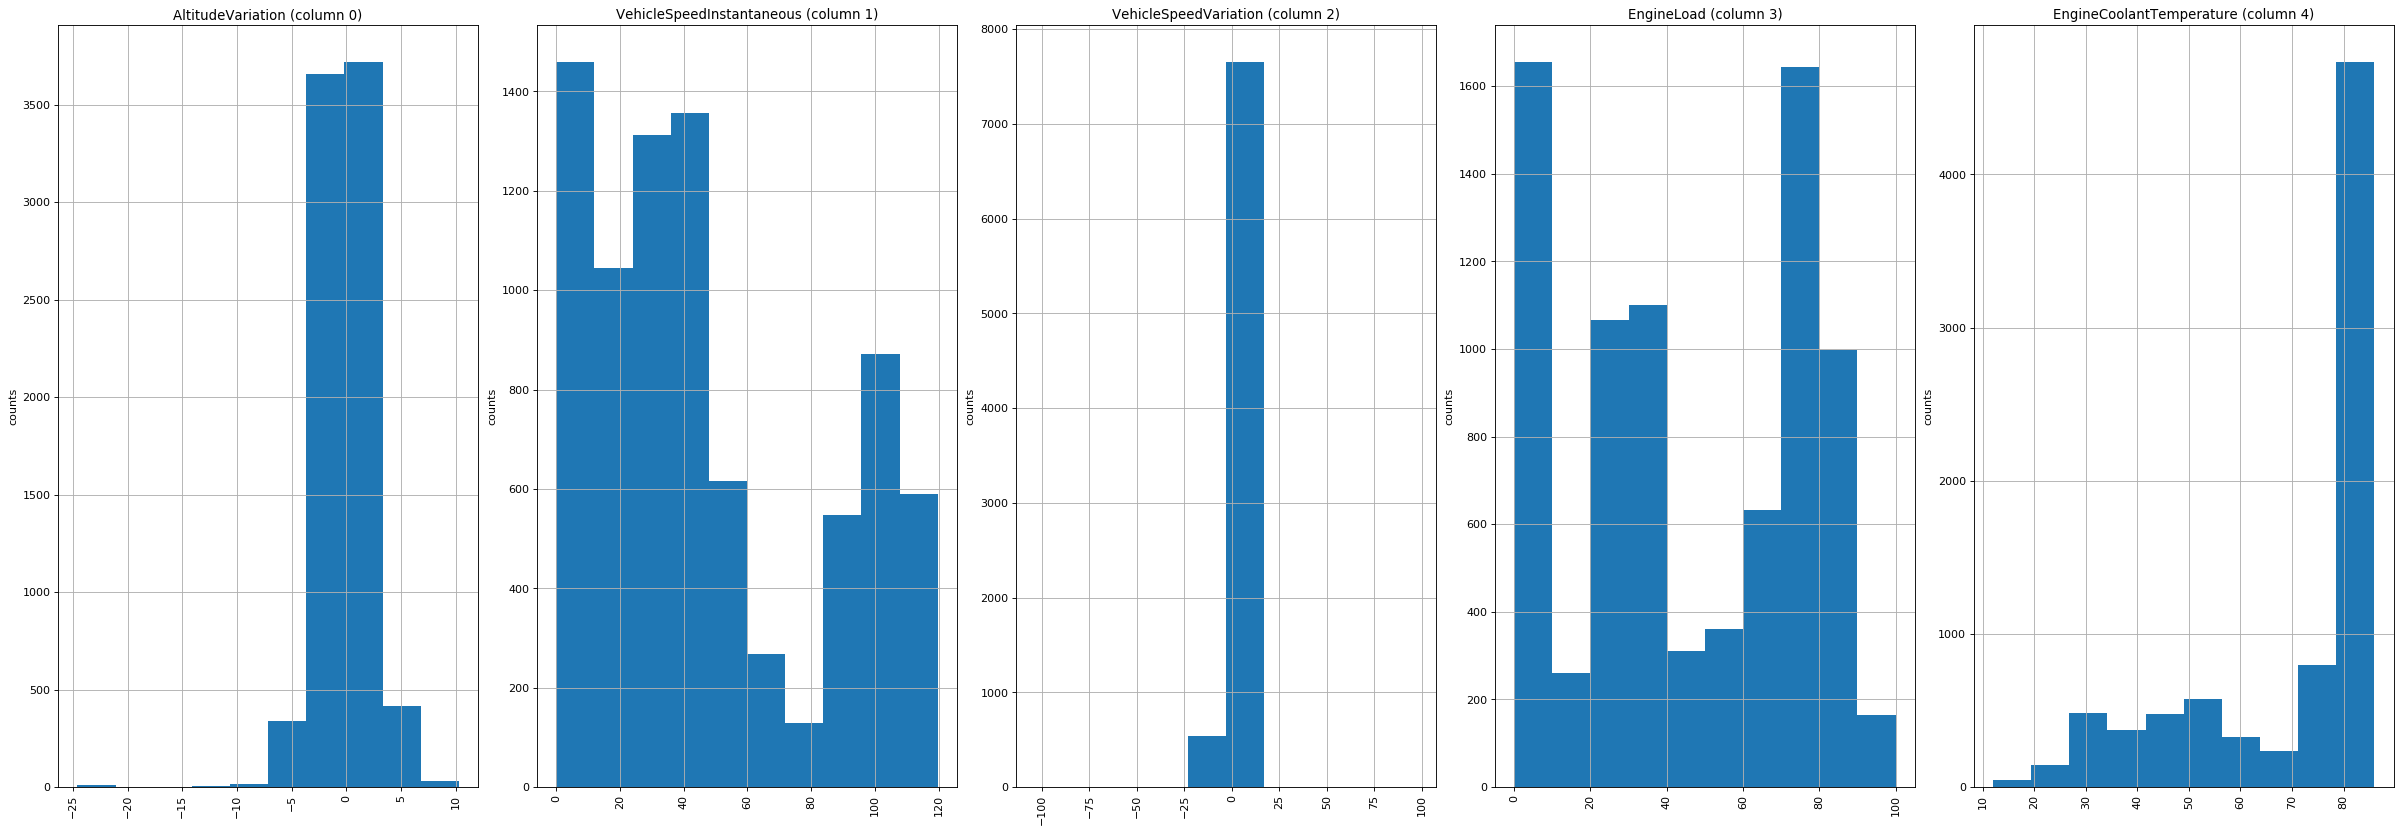

In [40]:
plotPerColumnDistribution(df, 5, 6)

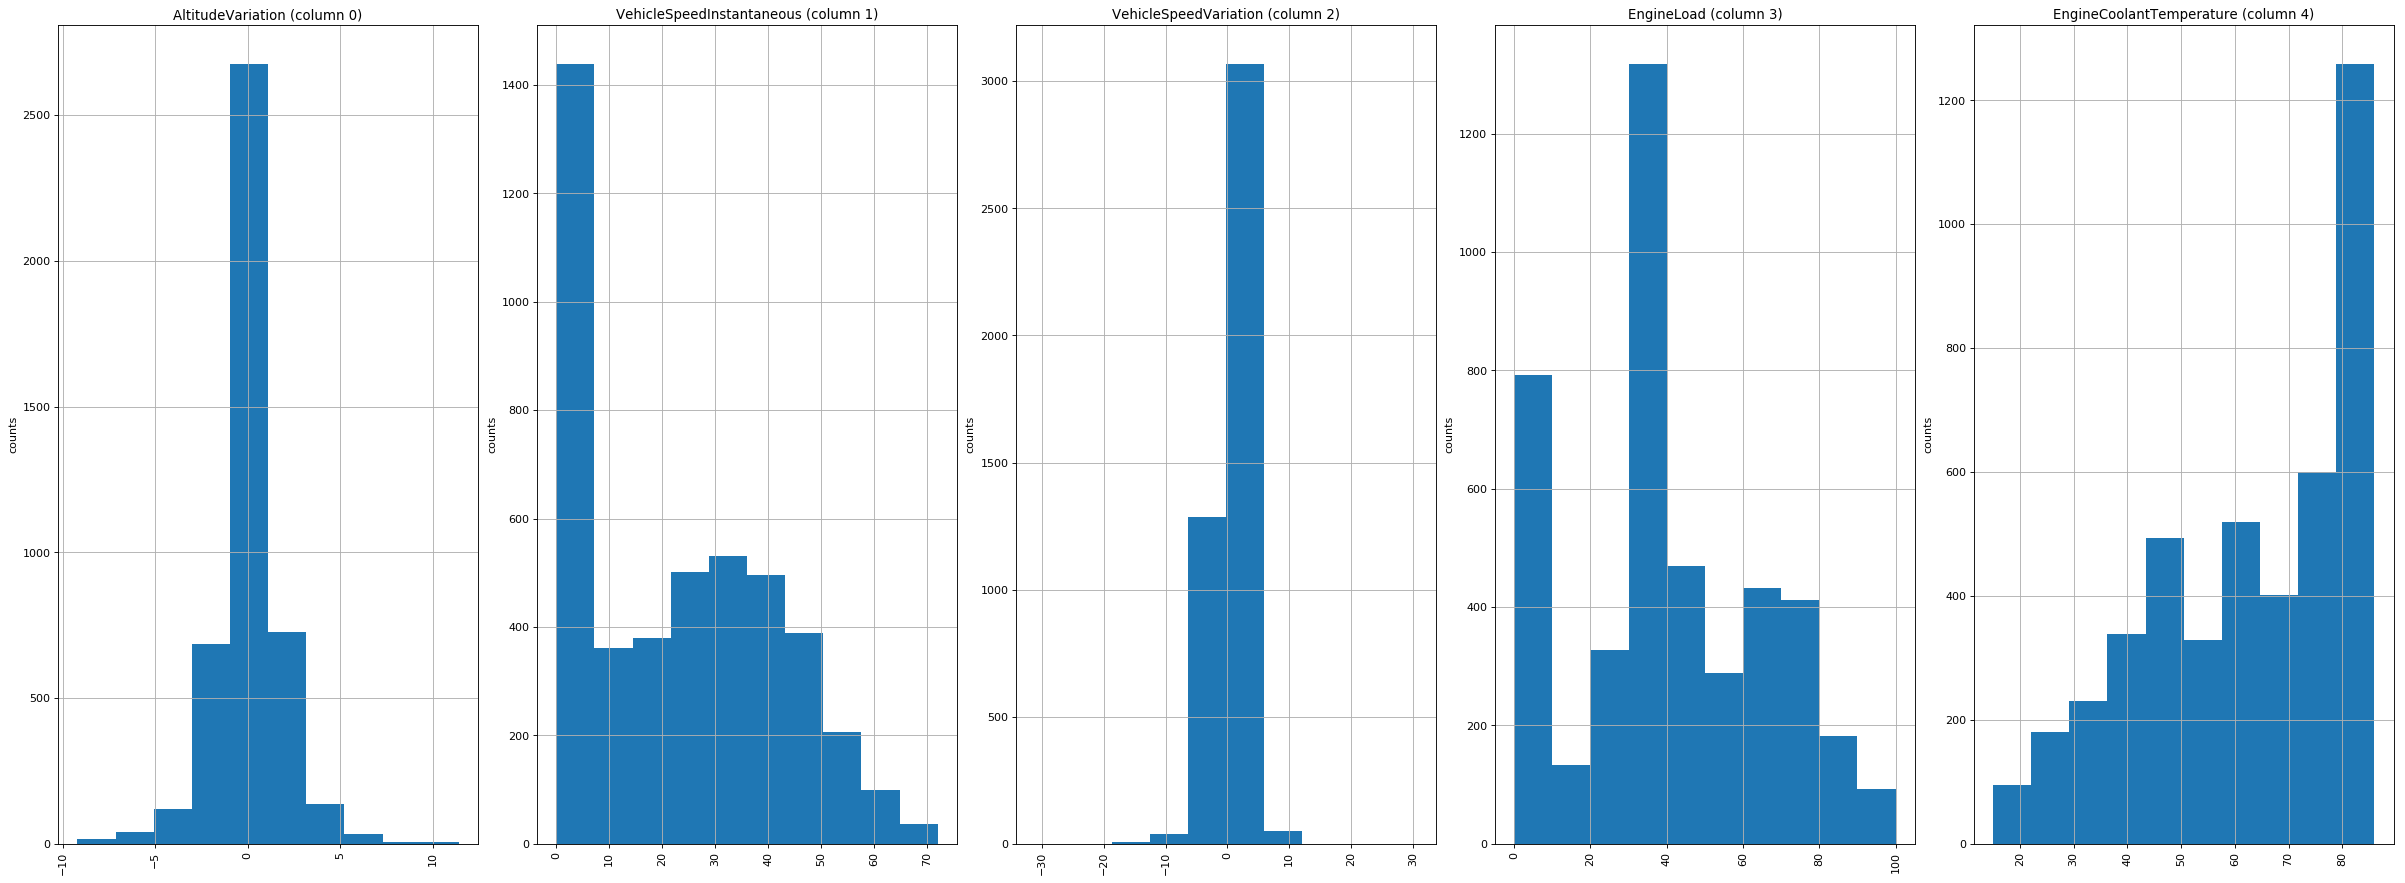

In [41]:
plotPerColumnDistribution(dfpeu, 5, 6)

In [46]:
def plotCorrelationMatrix(df, graphWidth):
    #filename = df.dataframeName
    #df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for peugeot01', fontsize=15)
    plt.show()

In [47]:
def plotCorrelationMatrixpeu(df, graphWidth):
    #filename = df.dataframeName
    #df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for peugeot02', fontsize=15)
    plt.show()

In [48]:
# Scatter and density plots for first 7 Columns
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    #df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:7]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [49]:
# Scatter and density plots for Columns 8-14
def plotScatterMatrix8_14(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    #df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[7:14]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

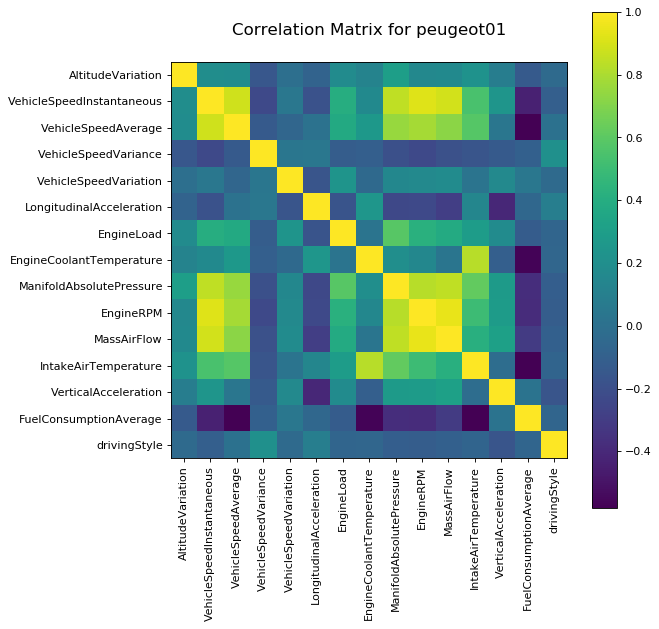

In [50]:
plotCorrelationMatrix(df, 8)

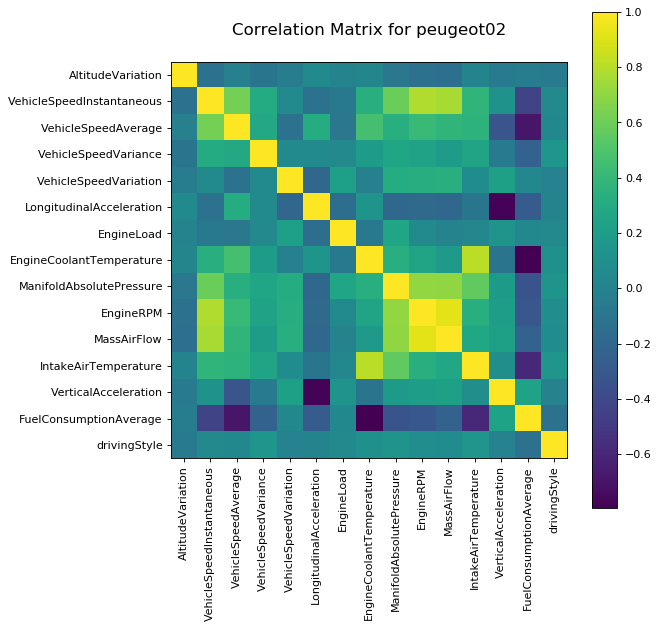

In [51]:
plotCorrelationMatrixpeu(dfpeu, 8)

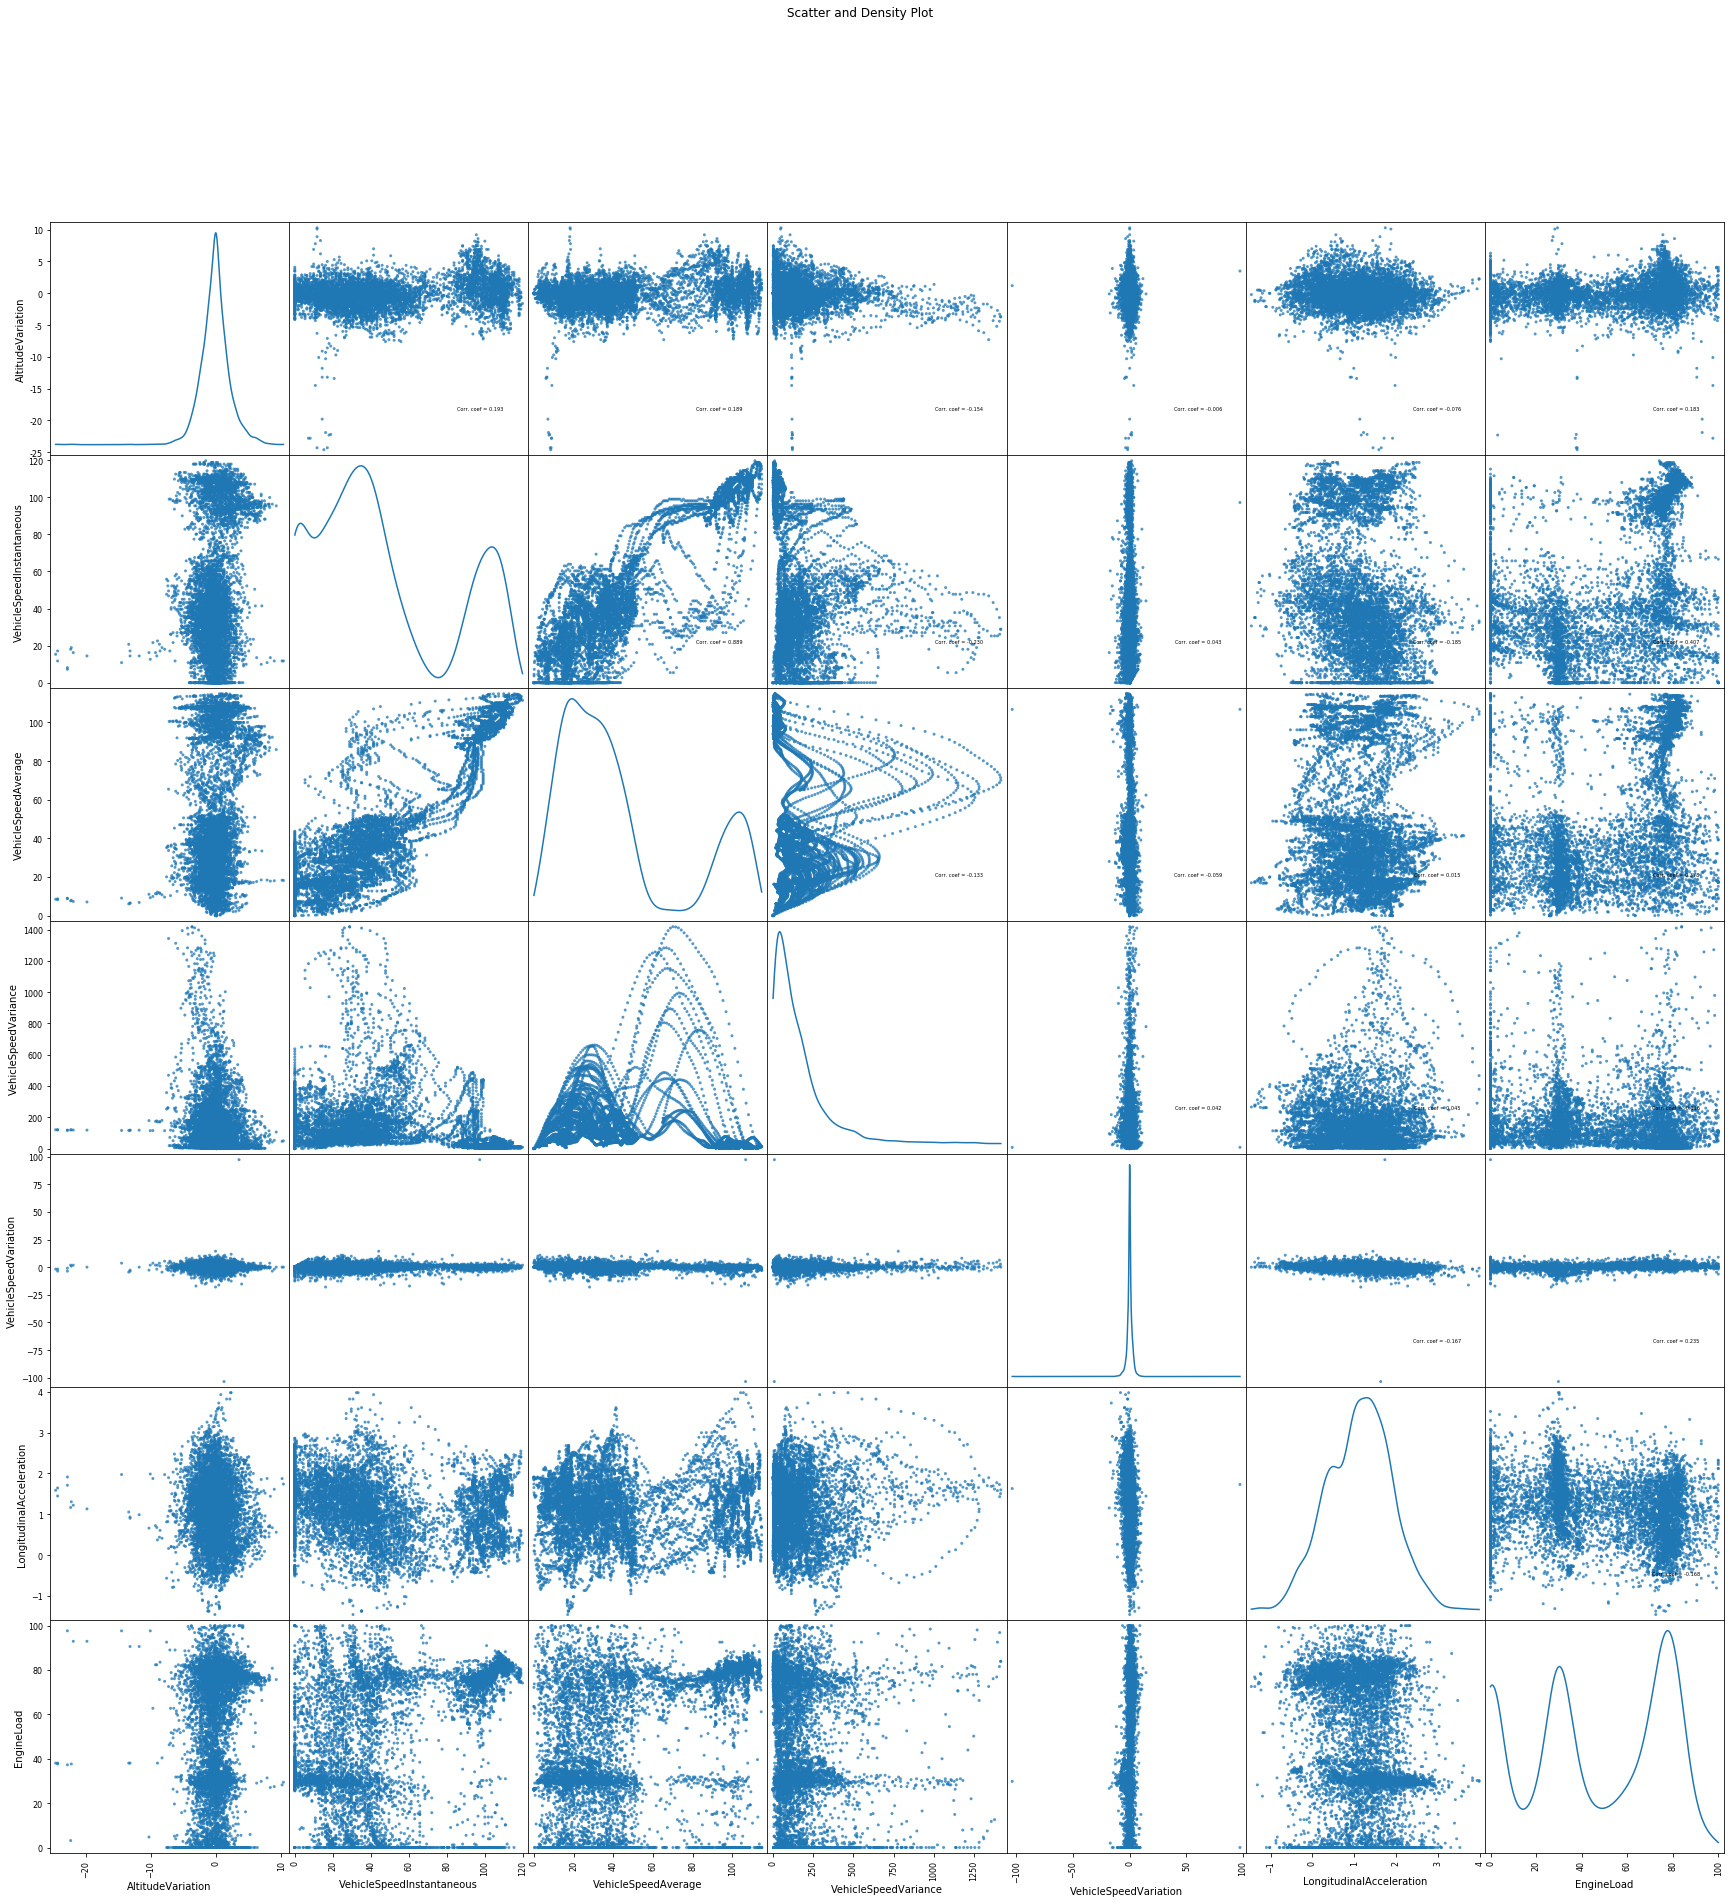

In [52]:
plotScatterMatrix(df, 30, 5)

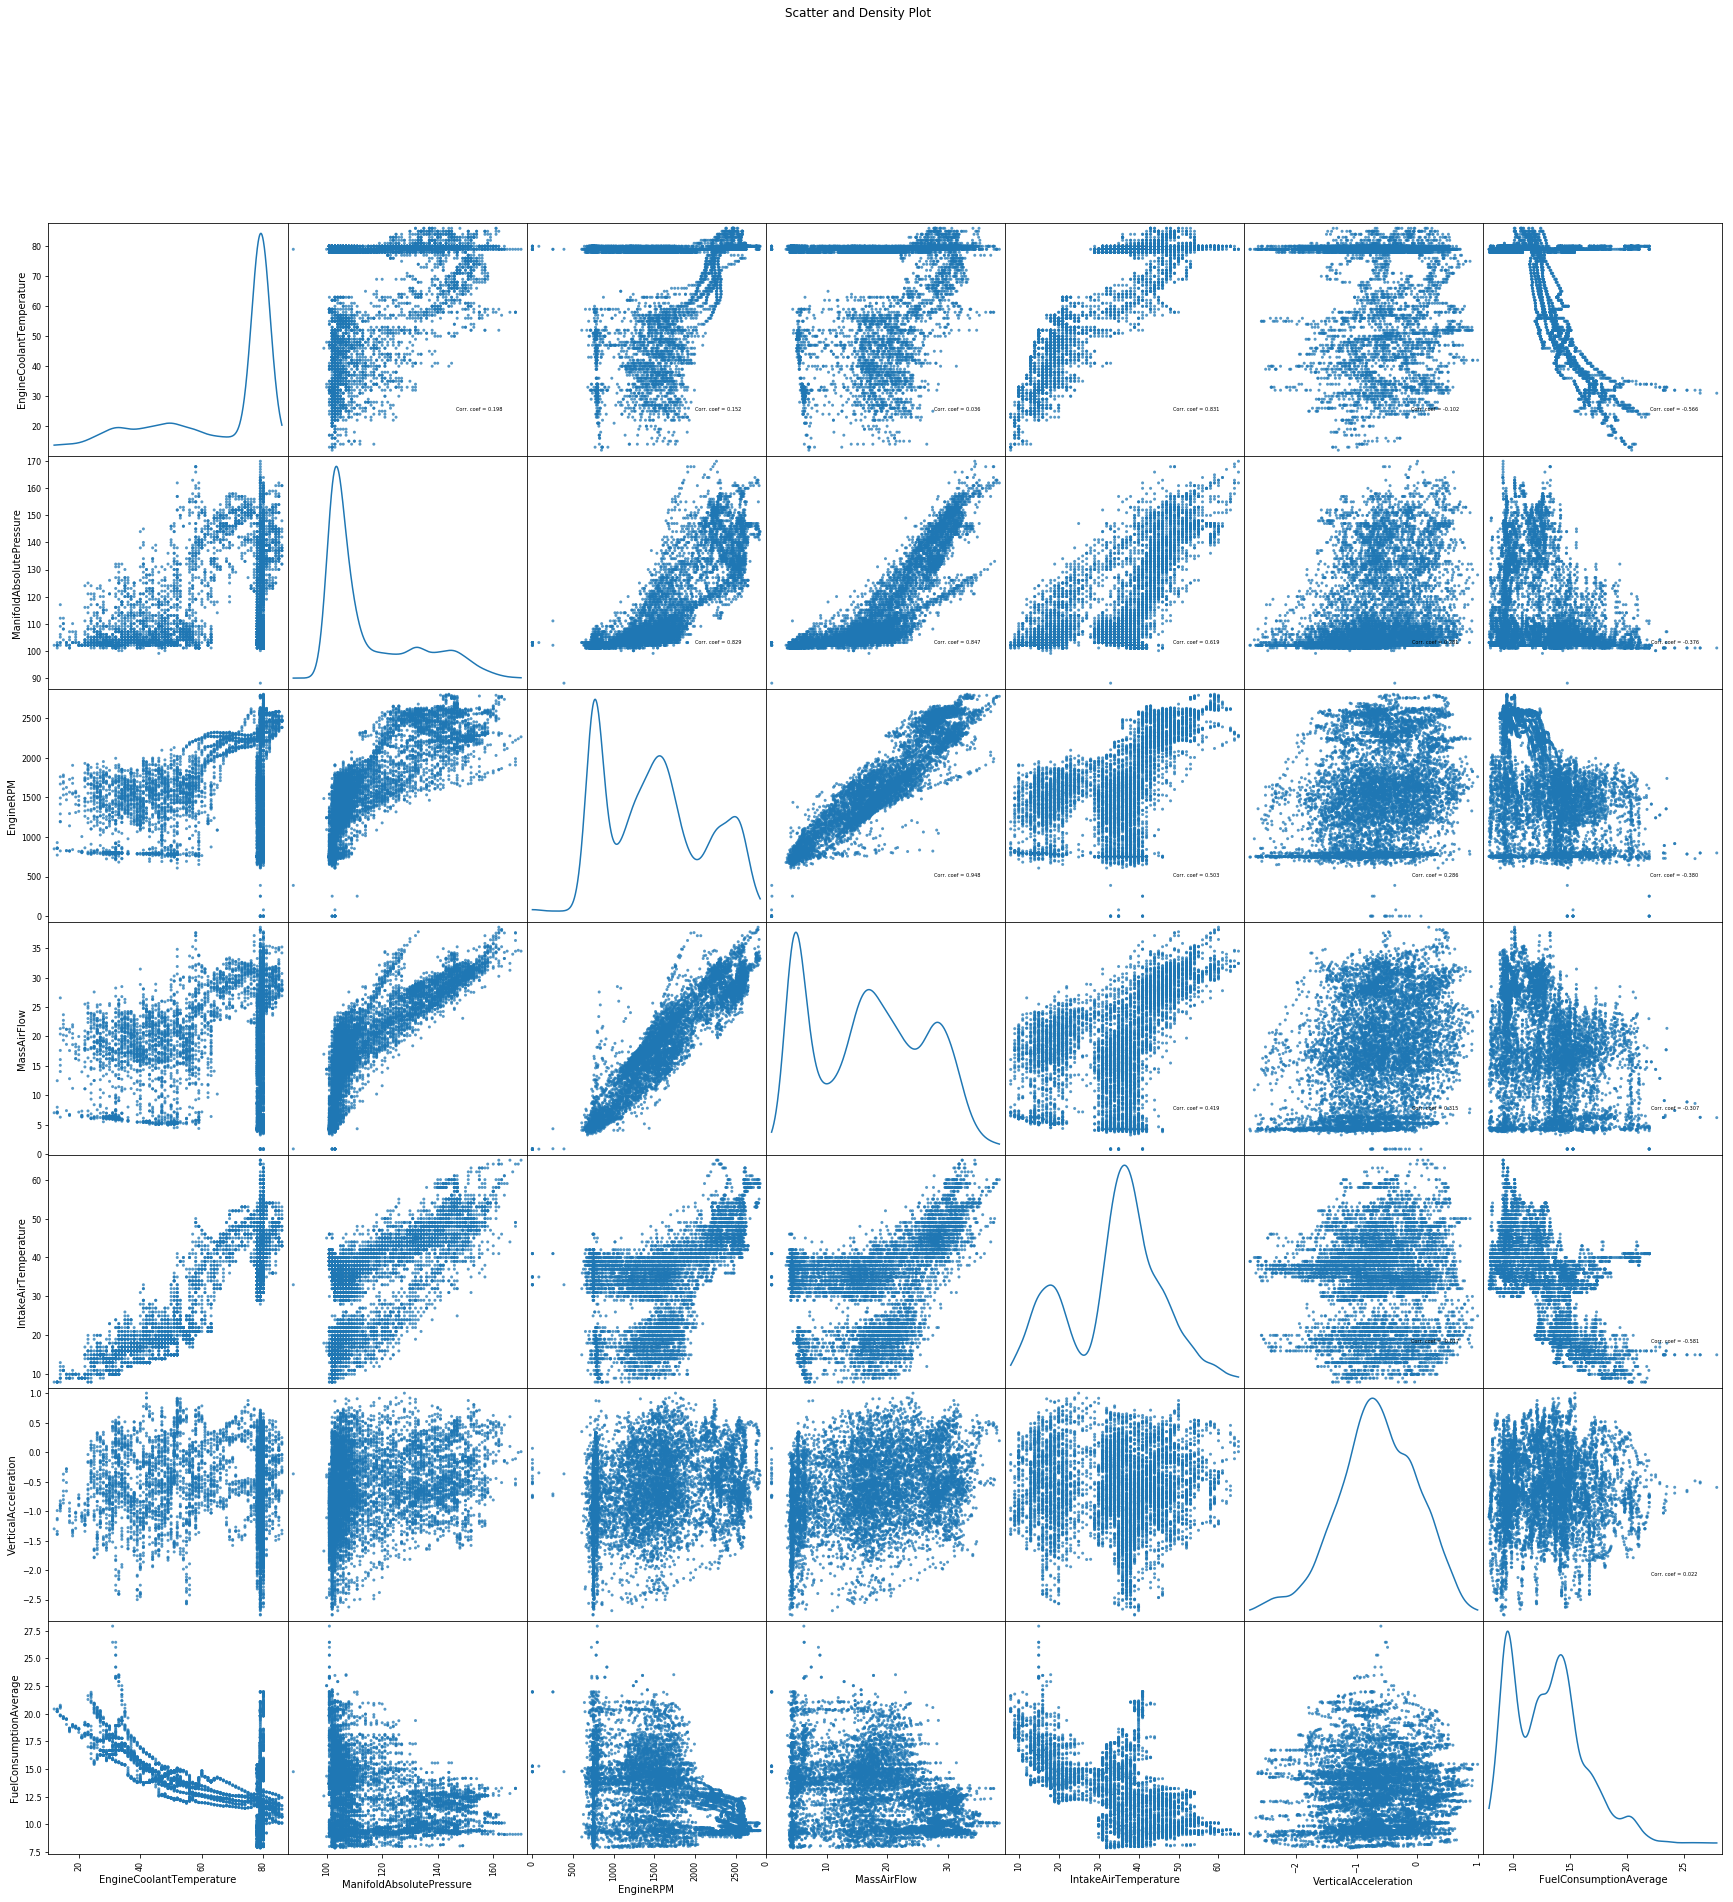

In [53]:
plotScatterMatrix8_14(df, 30, 5)

**Performing Linear Regression to predict 'drivingStyle'**

- Need to choose X values or features from the columns 1-14 to input into the classification model
- Responce or y value (drivingStyle) will be the output or prediction


from the correlation matrix - decided to choose columns 

In [100]:
list(df.columns)

['AltitudeVariation',
 'VehicleSpeedInstantaneous',
 'VehicleSpeedAverage',
 'VehicleSpeedVariance',
 'VehicleSpeedVariation',
 'LongitudinalAcceleration',
 'EngineLoad',
 'EngineCoolantTemperature',
 'ManifoldAbsolutePressure',
 'EngineRPM',
 'MassAirFlow',
 'IntakeAirTemperature',
 'VerticalAcceleration',
 'FuelConsumptionAverage',
 'roadSurface',
 'drivingStyle']

In [101]:
features = ['VehicleSpeedInstantaneous','VehicleSpeedAverage','ManifoldAbsolutePressure','EngineRPM','MassAirFlow','VerticalAcceleration','LongitudinalAcceleration','AltitudeVariation','VehicleSpeedVariance','VehicleSpeedVariation']

In [102]:
X = df[features]

In [103]:
X.head()

VehicleSpeedInstantaneous  VehicleSpeedAverage  ManifoldAbsolutePressure  \
0                  25.670519            13.223501                       106   
1                  24.094259            13.638919                       103   
2                  22.743179            14.031043                       103   
3                  22.292820            14.171073                       104   
4                  23.643900            14.328954                       104   

   EngineRPM  MassAirFlow  VerticalAcceleration  LongitudinalAcceleration  \
0       1796        15.81               -0.1133                    0.3555   
1       1689        14.65               -0.1289                    0.4492   
2       1599        11.85               -0.1328                    0.4258   
3       1620        12.21               -0.0859                    0.4140   
4       1708        11.91               -0.0664                    0.3945   

   AltitudeVariation  VehicleSpeedVariance  VehicleSpeedVariation  
0          -2.299988            121.592690              -2.476980  
1          -2.099976            120.422571              -1.576260  
2          -1.500000            118.456769              -1.351080  
3           0.100037            117.571308              -0.450359  
4           0.099976            117.074149               1.351080

In [105]:
print(X.shape)

(2000, 10)


In [106]:
y = df['drivingStyle']

In [107]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: drivingStyle, dtype: int64

In order to train a model need to make a trainin and test split of the data

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [111]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1500, 10)
(500, 10)
(1500,)
(500,)


In [128]:
from sklearn.linear_model import LinearRegression, LogisticRegression
linReg = LinearRegression()
linReg.fit(X_train,y_train)
y_pred = linReg.predict(X_test)


In [123]:
print(linReg.intercept_)
print(linReg.coef_)

-0.4457588605749542
[-9.30961080e-03  2.58095398e-03  5.86963155e-03  7.34727616e-05
  3.94717178e-03  4.32990083e-02 -2.10150297e-02 -4.04468495e-02
 -3.59789131e-05 -1.11596356e-02]


**the values above are the intercept and coef's calcualted from the training data - this values will be used in the prediction**
some values for the coef's produce a -value, perhaps having a negative influence in predicting drivingStyle 

In [116]:
from sklearn import metrics


In [125]:
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  0.2739940777687645
Root Mean Squared Error:  0.36645148959515983


**Performing Logistic Regression to predict 'drivingStyle'**

In [129]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)



c:\users\liam\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [131]:
y_pred = logreg.predict(X_test)

In [133]:
print("Compare actual resaponce with predicted: ", metrics.accuracy_score(y_test, y_pred))

Compare actual resaponce with predicted:  0.81


**Increasing the number of rows and performing Logistical regression on the Larger dataset to determine
if the training accuracy improves** 

In [134]:
opel_corsa01_data = pd.read_csv(opel_corsa_01LGa, nrows=7000)
# print a summary of the data in opel_corsa_01_LGa
opel_corsa01_data.describe()
df1 = opel_corsa01_data
df1['drivingStyle'] = df1.drivingStyle.replace({'EvenPaceStyle': 0, 'AggressiveStyle': 1})
df1['roadSurface']= df1.roadSurface.replace({'SmoothCondition': 0, 'UnevenCondition': 1})

In [139]:
list(df1.columns)

['AltitudeVariation',
 'VehicleSpeedInstantaneous',
 'VehicleSpeedAverage',
 'VehicleSpeedVariance',
 'VehicleSpeedVariation',
 'LongitudinalAcceleration',
 'EngineLoad',
 'EngineCoolantTemperature',
 'ManifoldAbsolutePressure',
 'EngineRPM',
 'MassAirFlow',
 'IntakeAirTemperature',
 'VerticalAcceleration',
 'FuelConsumptionAverage',
 'roadSurface',
 'drivingStyle']

In [140]:
features1 = ['VehicleSpeedInstantaneous','VehicleSpeedAverage','ManifoldAbsolutePressure','EngineRPM','MassAirFlow','VerticalAcceleration','LongitudinalAcceleration','AltitudeVariation','VehicleSpeedVariance','VehicleSpeedVariation']

In [141]:
X1= df1[features1]
y1 = df1['drivingStyle']

In [143]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 1)

In [144]:
logreg1 = LogisticRegression()
logreg1.fit(X1_train,y1_train)

c:\users\liam\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [145]:
y1_pred = logreg1.predict(X1_test)

In [146]:
print("Compare actual resaponce with predicted: ", metrics.accuracy_score(y1_test, y1_pred))

Compare actual resaponce with predicted:  0.8217142857142857


We only see a marginal increase in model efficeincy when increasing the number of rows in the training set

**Performing KNN with k=5 to predict 'drivingStyle'**

In [148]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X1_train, y1_train)
y2_pred = knn.predict(X1_test)

In [150]:
print(metrics.accuracy_score(y1_test, y2_pred))

0.8228571428571428


We only see a marginal increase in performance when using KNN and k=5

**Performing KNN with k=15 to predict 'drivingStyle'**

In [151]:
knn1 = KNeighborsClassifier(n_neighbors = 15)
knn1.fit(X1_train, y1_train)
y3_pred = knn1.predict(X1_test)

In [152]:
print(metrics.accuracy_score(y1_test, y3_pred))

0.8234285714285714


We see a slightly better rate of predicting response with K=15

**Performing KNN with k=20 to predict 'drivingStyle'**

In [153]:
knn2 = KNeighborsClassifier(n_neighbors = 20)
knn2.fit(X1_train, y1_train)
y4_pred = knn2.predict(X1_test)

In [154]:
print(metrics.accuracy_score(y1_test, y4_pred))

0.8337142857142857


**Performing KNN with k=30 to predict 'drivingStyle'**

In [155]:
knn3 = KNeighborsClassifier(n_neighbors = 30)
knn3.fit(X1_train, y1_train)
y5_pred = knn3.predict(X1_test)

In [156]:
print(metrics.accuracy_score(y1_test, y5_pred))

0.8291428571428572


**Performing SVM with kernel = rfb to predict 'drivingStyle'**

In [157]:
from sklearn import svm

In [160]:
modelsvm = svm.SVC(kernel ='rbf')

In [161]:
modelsvm.fit(X1_train, y1_train)

c:\users\liam\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [165]:
y6_pred = modelsvm.predict(X1_test)

In [166]:
print(metrics.accuracy_score(y1_test, y6_pred))

0.8274285714285714


**Performing SVM with kernel = linear to predict 'drivingStyle'**

In [167]:
modelsvm1 = svm.SVC(kernel ='linear')

In [168]:
modelsvm1.fit(X1_train, y1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [169]:
y7_pred = modelsvm1.predict(X1_test)

In [170]:
print(metrics.accuracy_score(y1_test, y7_pred))

0.8257142857142857
